In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Masters/10- December 2021/train.csv', header=None)
#X_train = df_train.iloc[:, 1:]
#Y_train = df_train.iloc[:, 0]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [ ]:
X_train = df_train.iloc[:, 1:]
#X_train.loc[(int(X_train[:]) > 127)] = 1
#X_train.loc[(int(X_train) <= 127)] = 0
Y_train = df_train.iloc[:, 0]

In [ ]:
print(X_train.head())
print(Y_train.head())

      1       2       3       4       5       6       7       8       9    \
0  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

      10   ...       775       776       777       778       779       780  \
0  pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

        781       782       783       784  
0  pixel780  pixel781  p

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
#X_train = X_train / 255.0

In [ ]:
def plot_digits(X, Y):
    for i in range(35):
        plt.subplot(5, 7, i+1)
        plt.tight_layout()
        #plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
        #print(type(np.real(X[i].reshape(28, 28))))
        #plt.imshow(np.float64(X[i]), cmap='gray')
        plt.imshow(np.float64(X[i].reshape(28, 28)), cmap='gray')
        #plt.title('Digit:{}'.format(Y.iloc[i]))
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

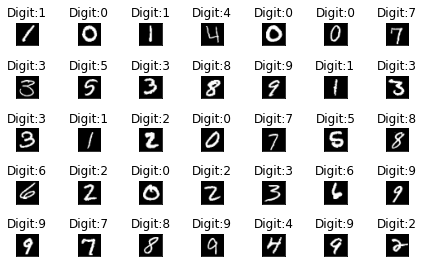

In [ ]:
plot_digits(X_train[1:], Y_train[1:])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


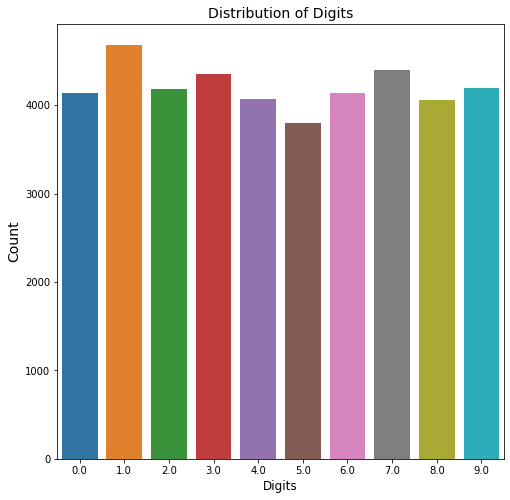

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(np.float32(Y_train[1:]))
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [ ]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(np.float32(X_train[1:]), np.float32(Y_train[1:]), test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [ ]:
np.unique(np.float32(Y_val))

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [ ]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

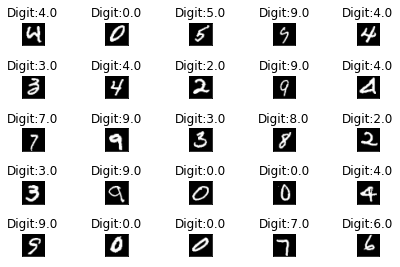

In [ ]:
plot_digits(X_val, Y_val)

In [ ]:
np.shape(X_dev)

(40740, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=4, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 4)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 4)         148       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 25)               

In [ ]:
adam = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
checkpoint_path = 'Lenet5Mnist_october.h5'
import tensorflow as tf
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only = True, verbose =1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [ ]:
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [ ]:
#model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, epochs=30, validation_data=(X_val, T_val), callbacks=[reduce_lr , cp_callback])
MyModel = model.fit( datagen.flow(np.float32(X_dev), np.float32(T_dev), batch_size=100), steps_per_epoch=len(X_dev)/100, epochs=30, validation_data=(np.float32(X_val), np.float32(T_val)), callbacks=[reduce_lr , cp_callback])

Epoch 1/30
407/407 [============================>.] - ETA: 0s - loss: 6.5568 - accuracy: 0.2188


Epoch 1: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 29s 71ms/step - loss: 6.5461 - accuracy: 0.2189 - val_loss: 1.9502 - val_accuracy: 0.3643 - lr: 5.0000e-04
Epoch 2/30
407/407 [============================>.] - ETA: 0s - loss: 1.9170 - accuracy: 0.3727


Epoch 2: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 27s 66ms/step - loss: 1.9165 - accuracy: 0.3731 - val_loss: 1.4075 - val_accuracy: 0.5849 - lr: 5.0000e-04
Epoch 3/30
408/407 [==============================] - ETA: 0s - loss: 1.4727 - accuracy: 0.5508


Epoch 3: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 29s 71ms/step - loss: 1.4727 - accuracy: 0.5508 - val_loss: 1.0120 - val_accuracy: 0.7032 - lr: 5.0000e-04
Epoch 4/30
408/407 [==============================] - ETA: 0s - loss: 1.1320 - accuracy: 0.6473


Epoch 4: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 29s 71ms/step - loss: 1.1320 - accuracy: 0.6473 - val_loss: 0.6772 - val_accuracy: 0.7841 - lr: 5.0000e-04
Epoch 5/30
407/407 [============================>.] - ETA: 0s - loss: 0.8939 - accuracy: 0.7242


Epoch 5: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 27s 66ms/step - loss: 0.8937 - accuracy: 0.7243 - val_loss: 0.5502 - val_accuracy: 0.8206 - lr: 5.0000e-04
Epoch 6/30
408/407 [==============================] - ETA: 0s - loss: 0.7273 - accuracy: 0.7740


Epoch 6: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 28s 68ms/step - loss: 0.7273 - accuracy: 0.7740 - val_loss: 0.4446 - val_accuracy: 0.8619 - lr: 5.0000e-04
Epoch 7/30
407/407 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.8165


Epoch 7: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 27s 66ms/step - loss: 0.5883 - accuracy: 0.8165 - val_loss: 0.3326 - val_accuracy: 0.8944 - lr: 5.0000e-04
Epoch 8/30
407/407 [============================>.] - ETA: 0s - loss: 0.4944 - accuracy: 0.8466


Epoch 8: saving model to Lenet5Mnist_october.h5
407/407 [==============================] - 29s 70ms/step - loss: 0.4941 - accuracy: 0.8467 - val_loss: 0.2874 - val_accuracy: 0.9175 - lr: 5.0000e-04


In [ ]:
score = model.evaluate(X_val, T_val, batch_size=32)

40/40 [==============================] - 1s 14ms/step - loss: 0.1315 - accuracy: 0.9571


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Masters/10- December 2021/test.csv')
X_test = np.array(df_test)
#X_test = X_test/255.0


X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)


#Y_test[:5]

875/875 [==============================] - 12s 13ms/step


In [ ]:
Y_test = np.argmax(Y_test, axis=1)

In [ ]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.unique(X_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
Y_test

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:


def plot_digits(X, Y):
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()



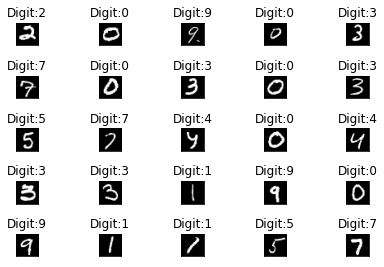

In [ ]:
plot_digits(X_test, Y_test)

In [ ]:
import h5py
dataset = h5py.File('/content/Lenet5Mnist_october.h5', 'r')
big = list(dataset.items())
print(big)
print(len(big))



[('conv2d_2', <HDF5 group "/conv2d_2" (1 members)>), ('conv2d_3', <HDF5 group "/conv2d_3" (1 members)>), ('dense_2', <HDF5 group "/dense_2" (1 members)>), ('dense_3', <HDF5 group "/dense_3" (1 members)>), ('flatten_1', <HDF5 group "/flatten_1" (0 members)>), ('max_pooling2d_2', <HDF5 group "/max_pooling2d_2" (0 members)>), ('max_pooling2d_3', <HDF5 group "/max_pooling2d_3" (0 members)>), ('top_level_model_weights', <HDF5 group "/top_level_model_weights" (0 members)>)]
8


In [ ]:
import sys

In [ ]:
np.set_printoptions(suppress=None)
#np.set_printoptions(precision=1000)
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
f = open("newweightsOCToberPRECISE.txt", "w")
for i in range (8):
  f.write("layer number:")
  f.write(str(i) + "\n")
  #print(big[i])
  f.write(big[i][0] + "\n")
  G1_list = list(dataset.get(big[i][0]))
  #print(G1_list)
  G1 = dataset.get(big[i][0])
  #print(G1)
  G2= G1.get(big[i][0])
  if G2 is not None: 
    G3 =list(G2.items())
    #print(G3)

    f.write(G3[0][0] + "\n")
    f.write(str(len(np.array(G2.get(G3[0][0]))))+ "\n")
    with np.printoptions(threshold= np.inf):
      #this
      #f.write(str(np.array(G2.get(G3[0][0])))+ "\n")
      f.write(str(np.float64(np.array(G2.get(G3[0][0])))))
      f.write("\n")
    #print((np.array(G2.get(G3[0][0]))).shape)
    #print((np.array(G2.get(G3[0][0])))[0].size)
    #for row in x:
    #  np.savetxt(f, row)
    f.write("--------------------------------------------------" + "\n") 
    f.write(G3[1][0]  + "\n")
    arr1= G2.get(G3[1][0])
    f.write(str(len(np.array(arr1)))+ "\n")
    if arr1.ndim is 4:
      arr2 = np.moveaxis(np.array(arr1),[0,1, 2, 3], [2,3,1,0])
    else:
      arr2 = np.array(arr1)
    #arr3 = np.rollaxis(arr2, axis= -1)
    with np.printoptions(threshold= np.inf):
      #this
      #f.write(str(arr2)+ "\n")
      f.write(str(np.float64(arr2)))
      f.write("\n")
    print((np.array(arr1)).shape)
    print(arr2.shape)
    #print((np.array(G2.get(G3[1][0])))[0].size)
    f.write("--------------------------------------------------" + "\n") 
  f.write("***************" + "\n")
  f.write("***************" + "\n")
  f.write("***************" + "\n")
f.close()

(5, 5, 1, 4)
(4, 1, 5, 5)
(3, 3, 4, 4)
(4, 4, 3, 3)
(100, 25)
(100, 25)
(25, 10)
(25, 10)


In [ ]:
f = open("newweightslastJan.txt", "w")
for i in range (8):
  f.write("layer number:")
  f.write(str(i) + "\n")
  #print(big[i])
  f.write(big[i][0] + "\n")
  G1_list = list(dataset.get(big[i][0]))
  #print(G1_list)
  G1 = dataset.get(big[i][0])
  #print(G1)
  G2= G1.get(big[i][0])
  if G2 is not None: 
    G3 =list(G2.items())
    #print(G3)

    f.write(G3[0][0] + "\n")
    f.write(str(len(np.array(G2.get(G3[0][0]))))+ "\n")
    with np.printoptions(threshold= np.inf):
      f.write(str(np.array(G2.get(G3[0][0])))+ "\n")
    #print((np.array(G2.get(G3[0][0]))).shape)
    #print((np.array(G2.get(G3[0][0])))[0].size)
    #for row in x:
    #  np.savetxt(f, row)
    f.write("--------------------------------------------------" + "\n") 
    f.write(G3[1][0]  + "\n")
    arr1= G2.get(G3[1][0])
    f.write(str(len(np.array(arr1)))+ "\n")
    if arr1.ndim is 4:
      arr2 = np.moveaxis(np.array(arr1),[0,1, 2, 3], [2,3,1,0])
    else:
      arr2 = np.array(arr1)
    #arr3 = np.rollaxis(arr2, axis= -1)
    with np.printoptions(threshold= np.inf):
      f.write(str(arr2)+ "\n")
    print((np.array(arr1)).shape)
    print(arr2.shape)
    #print((np.array(G2.get(G3[1][0])))[0].size)
    f.write("--------------------------------------------------" + "\n") 
  f.write("***************" + "\n")
  f.write("***************" + "\n")
  f.write("***************" + "\n")
f.close()

In [ ]:

weight = model.get_weights()
np.savetxt('weight.csv' , weight , fmt='%s', delimiter=',')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [ ]:
#print(read(l1f1))

In [ ]:
def btats(i, lista, number):
  bitlist = ["5'b00000: dout <=64'b", "5'b00001: dout <=64'b","5'b00010: dout <=64'b","5'b00011: dout <=64'b","5'b00100: dout <=64'b",
            "5'b00101: dout <=64'b","5'b00110: dout <=64'b","5'b00111: dout <=64'b","5'b01000: dout <=64'b","5'b01001: dout <=64'b",
            "5'b01010: dout <=64'b","5'b01011: dout <=64'b","5'b01100: dout <=64'b","5'b01101: dout <=64'b","5'b01110: dout <=64'b",
            "5'b01111: dout <=64'b","5'b10000: dout <=64'b","5'b10001: dout <=64'b","5'b10010: dout <=64'b","5'b10011: dout <=64'b",
            "5'b10100: dout <=64'b","5'b10101: dout <=64'b","5'b10110: dout <=64'b","5'b10111: dout <=64'b","5'b11000: dout <=64'b",
            "5'b11001: dout <=64'b",]
  f = "module ROM_26x64bit_F"+str(i) + "(clk, addr, dout); input clk; input [4:0] addr; output reg [63:0] dout; always @(posedge clk) begin case(addr)"
  print(f)
  for t in range(0, 25):
    print(bitlist[t], lista[t], ";")
  print(bitlist[25], number,  ";", " endcase end endmodule")

In [ ]:
uu=0

In [ ]:
l1f1 = open("/content/l2f4c4", 'r')
#print(l1f1.read())
cc= []
for t in l1f1:
  if((len(t) == 65) | (len(t) == 64)): 
    #print(t)
    cc.append(t[0:64])
btats(2,cc,222)

In [ ]:
def btats(i, lista, number):
  bitlist = ["4'b0000: dout <=64'b", "4'b0001: dout <=64'b","4'b0010: dout <=64'b","4'b0011: dout <=64'b","4'b0100: dout <=64'b",
            "4'b0101: dout <=64'b","4'b0110: dout <=64'b","4'b0111: dout <=64'b","4'b1000: dout <=64'b"]
  f = "module ROM_9x64bit_F"+str(i) + "(clk, addr, dout); input clk; input [4:0] addr; output reg [63:0] dout; always @(posedge clk) begin case(addr)"
  print(f)
  for t in range(0, 9):
    print(bitlist[t], lista[t], ";")
  print(" endcase end endmodule")

In [ ]:
for g in range ()

In [ ]:
v=0

In [ ]:
import numpy as np

In [ ]:
bb = np.array([[1,2] ,[3,4], [5,6]])

In [ ]:
print(bb)

In [ ]:
print(bb.ndim)

In [ ]:
arr2 = np.moveaxis(np.array(bb),[0,1], [1,0])

In [ ]:
ccccc=9

In [ ]:
print(arr2)

In [ ]:
iiii=0

In [ ]:
g = open()

In [ ]:
f = open("/content/dense1main", "r")
cc= []
for g in f:
  if (len(g)== 65 | (len(g) == 64)):
    cc.append(g[0:64])

In [ ]:
print(len(cc))

In [ ]:
hhhhhh=9

In [ ]:
for g in range(0, 101):
  strr= "weight_of_dense1_" + str(g)
  h = open(strr+ ".txt", 'w')
  for tt in range(0, 25):
    #print(cc[25*g +tt], end=" ")
    h.write(cc[25*g +tt]+ "\n")
  print(g)

In [ ]:
#for yy in range(0, 25):
for g in range(0, 100):
  strr= "weight_of_dense1_" + str(g)
  h = open(strr+ ".txt", 'r')
  print(h.readline())
  #for tt in range(0, 25):
    #print(cc[25*g +tt], end=" ")
    #h.write(cc[25*g +tt]+ "\n")
  print(g)

In [ ]:
print()

In [ ]:
g = 0
strr= "weight_of_dense1_" + str(g)
h = open(strr+ ".txt", 'r')
line = h.readline()
print(line)

In [ ]:
25*64

In [ ]:
for t in h:
  print(t)

In [ ]:
g =0
strr= "weight_of_dense1_" + str(g)
h = open(strr+ ".txt", 'r')
for hh in h:
  print(hh)

In [ ]:
for t in range(0, 25):
  ghgh =[]
  for g in range(0, 100):
    strr= "weight_of_dense1_" + str(g)
    h = open(strr+ ".txt", 'r')
    p= []
    for hh in h:
      p.append(hh)
    ghgh.append(p)

In [ ]:
print(len(ghgh))

In [ ]:
print(ghgh)

In [ ]:
ghgh.ndim

In [ ]:
nnn = np.asarray(ghgh)

In [ ]:
print(nnn.ndim)

In [ ]:
arr2 = np.moveaxis(np.array(nnn),[0,1], [1,0])

In [ ]:
print(arr2)

In [ ]:
iiiiiiiiiiiiiiiiiiiiii=0

In [ ]:
print(len(arr2))

In [ ]:
k = open("organized.txt", 'w')
#k.write(arr2)
for row in arr2:
    print(row)

In [ ]:
def btats(i, lista, number):
  bitlist = ["7'b00000: dout <=64'b", "7'b00001: dout <=64'b","7'b00010: dout <=64'b","7'b00011: dout <=64'b","7'b00100: dout <=64'b",
            "7'b00101: dout <=64'b","7'b00110: dout <=64'b","7'b00111: dout <=64'b","7'b01000: dout <=64'b","7'b01001: dout <=64'b",
            "7'b01010: dout <=64'b","7'b01011: dout <=64'b","7'b01100: dout <=64'b","7'b01101: dout <=64'b","7'b01110: dout <=64'b",
            "7'b01111: dout <=64'b","7'b10000: dout <=64'b","7'b10001: dout <=64'b","7'b10010: dout <=64'b","7'b10011: dout <=64'b",
            "7'b10100: dout <=64'b","7'b10101: dout <=64'b","7'b10110: dout <=64'b","7'b10111: dout <=64'b","7'b11000: dout <=64'b",
            "7'b11001: dout <=64'b", 
             "7'b11010: dout <=64'b","7'b11011: dout <=64'b","7'b11100: dout <=64'b","7'b11101: dout <=64'b","7'b11110: dout <=64'b",
             "7'b11111: dout <=64'b","7'b100000: dout <=64'b","7'b100001: dout <=64'b","7'b100010: dout <=64'b","7'b100011: dout <=64'b",
             "7'b100100: dout <=64'b","7'b100101: dout <=64'b","7'b100110: dout <=64'b","7'b100111: dout <=64'b","7'b101000: dout <=64'b",
             "7'b101001: dout <=64'b","7'b101010: dout <=64'b","7'b101011: dout <=64'b","7'b101100: dout <=64'b","7'b101101: dout <=64'b",
             "7'b101110: dout <=64'b","7'b101111: dout <=64'b","7'b110000: dout <=64'b","7'b110001: dout <=64'b","7'b110010: dout <=64'b",
             "7'b110011: dout <=64'b",
             "7'b110100: dout <=64'b","7'b110101: dout <=64'b","7'b110110: dout <=64'b","7'b110111: dout <=64'b",
             "7'b111000: dout <=64'b","7'b111001: dout <=64'b","7'b111010: dout <=64'b","7'b111011: dout <=64'b","7'b111100: dout <=64'b",
             "7'b111101: dout <=64'b","7'b111110: dout <=64'b","7'b111111: dout <=64'b","7'b1000000: dout <=64'b","7'b1000001: dout <=64'b",
             "7'b1000010: dout <=64'b","7'b1000011: dout <=64'b","7'b1000100: dout <=64'b","7'b1000101: dout <=64'b","7'b1000110: dout <=64'b",
             "7'b1000111: dout <=64'b","7'b1001000: dout <=64'b","7'b1001001: dout <=64'b","7'b1001010: dout <=64'b","7'b1001011: dout <=64'b",
             "7'b1001100: dout <=64'b","7'b1001101: dout <=64'b","7'b1001110: dout <=64'b","7'b1001111: dout <=64'b","7'b1010000: dout <=64'b",
             "7'b1010001: dout <=64'b","7'b1010010: dout <=64'b","7'b1010011: dout <=64'b","7'b1010100: dout <=64'b","7'b1010101: dout <=64'b",
             "7'b1010110: dout <=64'b","7'b1010111: dout <=64'b","7'b1011000: dout <=64'b","7'b1011001: dout <=64'b","7'b1011010: dout <=64'b",
             "7'b1011011: dout <=64'b","7'b1011100: dout <=64'b","7'b1011101: dout <=64'b","7'b1011110: dout <=64'b","7'b1011111: dout <=64'b",
             "7'b1100000: dout <=64'b","7'b1100001: dout <=64'b","7'b1100010: dout <=64'b","7'b1100011: dout <=64'b","7'b1100100: dout <=64'b",
             "7'b1100101: dout <=64'b"      ]
  f = "module ROM_26x64bit_F"+str(i) + "(clk, addr, dout); input clk; input [4:0] addr; output reg [63:0] dout; always @(posedge clk) begin case(addr)"
  print(f)
  for t in range(0, 100):
    print(bitlist[t], lista[t], ";")
  print(bitlist[100], number,  ";", " endcase end endmodule")


In [ ]:
1+2+32+64

In [ ]:
print(l1f1.read())

In [ ]:
print(t)

In [ ]:
l1f1 = open("/content/dens1out24.txt", 'r')
#print(l1f1.read())
cc= []
for t in l1f1:
  #print(t[0:64])
  cc.append(t[0:64])
  #if((len(t) == 65) | (len(t) == 64)): 
    #print(t)
    #cc.append(t[0:64])
#print(len(cc))
btats(2,cc,222)

In [ ]:
g=99

In [ ]:
def btats(i, lista, number):
  bitlist = ["5'b00000: dout <=64'b", "5'b00001: dout <=64'b","5'b00010: dout <=64'b","5'b00011: dout <=64'b","5'b00100: dout <=64'b",
            "5'b00101: dout <=64'b","5'b00110: dout <=64'b","5'b00111: dout <=64'b","5'b01000: dout <=64'b","5'b01001: dout <=64'b",
            "5'b01010: dout <=64'b","5'b01011: dout <=64'b","5'b01100: dout <=64'b","5'b01101: dout <=64'b","5'b01110: dout <=64'b",
            "5'b01111: dout <=64'b","5'b10000: dout <=64'b","5'b10001: dout <=64'b","5'b10010: dout <=64'b","5'b10011: dout <=64'b",
            "5'b10100: dout <=64'b","5'b10101: dout <=64'b","5'b10110: dout <=64'b","5'b10111: dout <=64'b","5'b11000: dout <=64'b",
            "5'b11001: dout <=64'b",]
  f = "module ROM_26x64bit_F"+str(i) + "(clk, addr, dout); input clk; input [4:0] addr; output reg [63:0] dout; always @(posedge clk) begin case(addr)"
  for t in range(0, 25):
    print(bitlist[t], lista[t], ";")
  print(bitlist[25], number,  ";")

In [ ]:
l1f1 = open("/content/dense2_9.txt", 'r')
#print(l1f1.read())
cc= []
for t in l1f1:
  #print(t[0:64])
  cc.append(t[0:64])
  #if((len(t) == 65) | (len(t) == 64)): 
    #print(t)
    #cc.append(t[0:64])
#print(len(cc))
btats(2,cc,222)

In [ ]:
f = open("/content/dense2main.txt", "r")
cc= []
for g in f:
  if (len(g)== 65 | (len(g) == 64)):
    cc.append(g[0:64])

In [ ]:
print(len(cc))

In [ ]:
for g in range(0, 26):
  strr= "weight_of_dense2_" + str(g)
  h = open(strr+ ".txt", 'w')
  for tt in range(0, 10):
    #print(cc[25*g +tt], end=" ")
    h.write(cc[10*g +tt]+ "\n")
  print(g)

In [ ]:
for t in range(0, 10):
  ghgh =[]
  for g in range(0, 25):
    strr= "weight_of_dense2_" + str(g)
    h = open(strr+ ".txt", 'r')
    p= []
    for hh in h:
      p.append(hh)
    ghgh.append(p)

In [ ]:
print(len(ghgh))

In [ ]:
nnn = np.asarray(ghgh)

In [ ]:
print(nnn.ndim)

In [ ]:
arr2 = np.moveaxis(np.array(nnn),[0,1], [1,0])

In [ ]:
print(len(arr2))

In [ ]:
print(arr2)

In [ ]:
k = open("organized.txt", 'w')
k.write(arr2)
for row in arr2:
    print(row)

In [ ]:
H=-2987654321
G=3123456782
H*G

In [ ]:
-0.09331809151199055 * 2
011011111111000111111000111011000111000111001010110100110001101000

In [ ]:
3.123456782e04 * -2.987654321e-06 = 011011111110110111111000111011000111000111001010110100110001101000